In [66]:
include("dsm.jl")

import dsm
import PyPlot
import DSP

In [67]:
f_s = 1e6;
T_s = 1/f_s;

n_fft = 2^16;
k = 17;

f_i = f_s/n_fft*k;
a_i = .9;
b_i = 0;

n_i = 0;

t = 0:T_s:T_s*(n_fft-1);
inp = a_i*sin.(2*pi*f_i*t) + b_i + 2*n_i*(rand(size(t))-.5);

int = zeros(size(t));
q   = zeros(size(t));
q[1] = 1;

for i = 2:length(inp)
    int[i] = int[i-1] + (inp[i] - q[i-1]);
    q[i] = (int[i] > 0)*2-1;
end

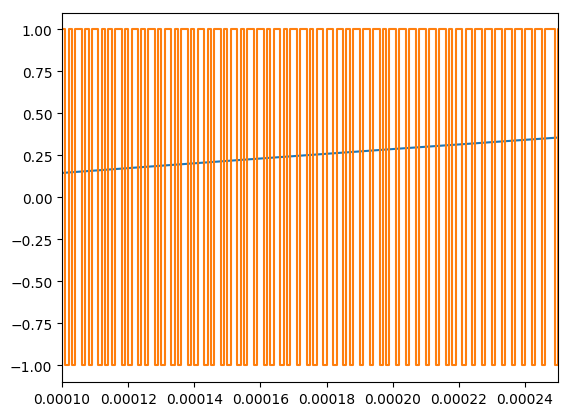

In [68]:
PyPlot.plot(t, inp);
PyPlot.hold(true);
PyPlot.step(t, q);
PyPlot.hold(false);
PyPlot.xlim((1e-4, 2.5e-4));

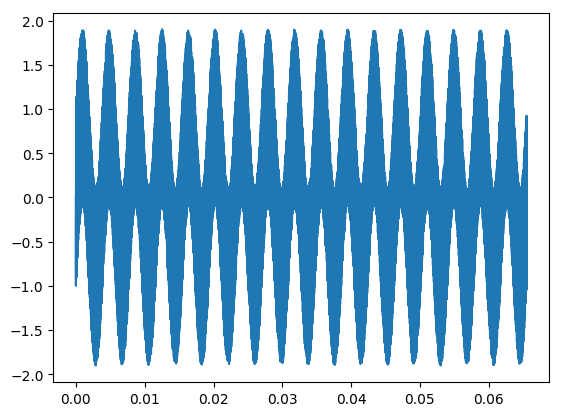

In [69]:
PyPlot.plot(t, int);

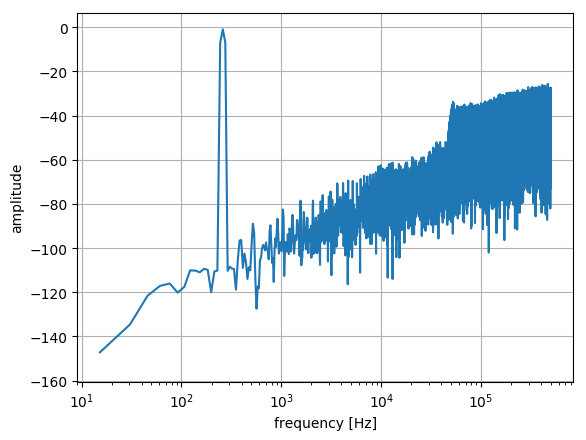

In [70]:
w = DSP.Windows.hanning(n_fft);
wf = mean(w);
Y_inp = fft(q.*w)/n_fft/wf;

f = linspace(0, f_s/2, (n_fft/2+1));

PyPlot.semilogx(f, 20*log10.(2*abs.(Y_inp[1:trunc(Int64, n_fft/2+1)])));
PyPlot.xlabel("frequency [Hz]");
PyPlot.ylabel("amplitude");
PyPlot.grid();

In [71]:
osr_sw = [2^i for i in 2:10];
f_bw_sw = f_s/2./osr_sw;
snr_sw = zeros(length(osr_sw));

for (i, f_bw) in enumerate(f_bw_sw)
    snr_sw[i] = dsm.snr(q, f_i, f_bw, f_s);
end

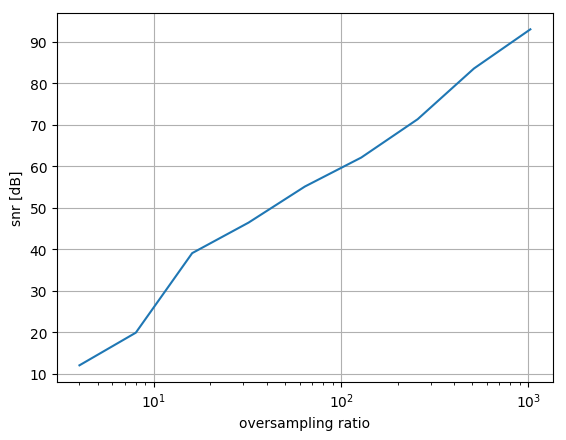

In [72]:
PyPlot.semilogx(osr_sw, snr_sw);
PyPlot.xlabel("oversampling ratio");
PyPlot.ylabel("snr [dB]")
PyPlot.grid();

In [73]:
diff(snr_sw)

8-element Array{Float64,1}:
  7.85891
 19.1575 
  7.34858
  8.69436
  6.97892
  9.22481
 12.224  
  9.4277 